In [5]:
!pip install mlxtend #Installing necessary machine learning library for market basket analysis

In [1]:
#Importing necessary libraries for data processing and data visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#from apyori import apriori

In [33]:
#Data is Online Retail Data Set from UCI repository
#Online Link to the dataset given below:
#https://archive.ics.uci.edu/ml/datasets/online+retail
#This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a
#UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts.
#Many customers of the company are wholesalers.
#Reaading data into Pandas dataframe

df = pd.read_excel(r'C:\Users\simounima\Desktop\Online_Retail.xlsx')

In [34]:
#Displaying the top 10 values in the dataframe
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [35]:
df.shape

(541909, 8)

In [36]:
print("All Transactions Data\n", df.dtypes)


All Transactions Data
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [37]:
#Exploratory Data Analysis
#- Results show CustomerID and Description has null values.

df.isnull().sum().sort_values(ascending=False)


CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [38]:
#Top 5 records shown which has null values
df[df.isnull().any(axis=1)].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [39]:
df.columns = df.columns.str.strip() #remove white spaces everywhere


In [40]:
#Converting invoice number to string to remove the orders starting with 'C' which are cancelled orders 
#and doesn't help for our analysis
df['InvoiceNo'] = df['InvoiceNo'].astype('str')


In [41]:
df = df[~df['InvoiceNo'].str.contains('C')]


In [358]:
#Checking if any -ve or 0 Quantity values
(df['Quantity'] <= 0).all() 
df['Quantity'].count()

531285

In [359]:
#Keeping only records which have positive quantity values
df['Quantity'] = df[df['Quantity'] > 0]['Quantity']


In [360]:
df['Quantity'].count()

531285

In [45]:
#Similarly, considering only Unit Price values which are positive and have some value
df['UnitPrice'] = df[df['UnitPrice'] > 0]['UnitPrice']

In [361]:
#To drop all NA value records in the dataframe
df_nona = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [46]:
#To analyze number of orders for each customer
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

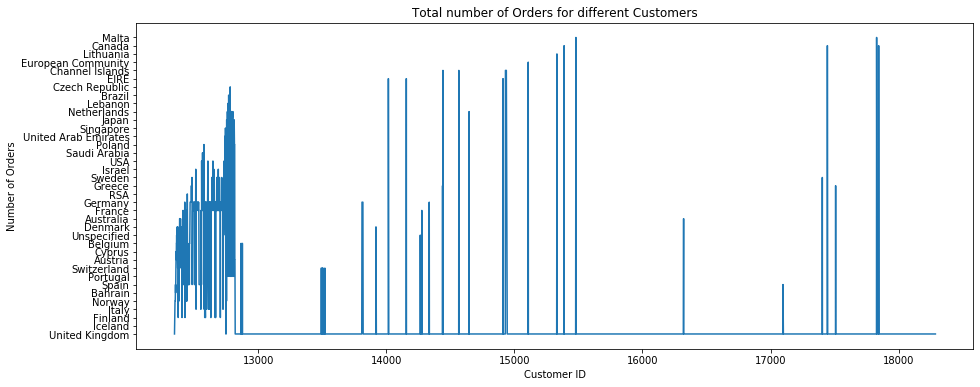

In [47]:
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.Country)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Total number of Orders for different Customers')
plt.show()

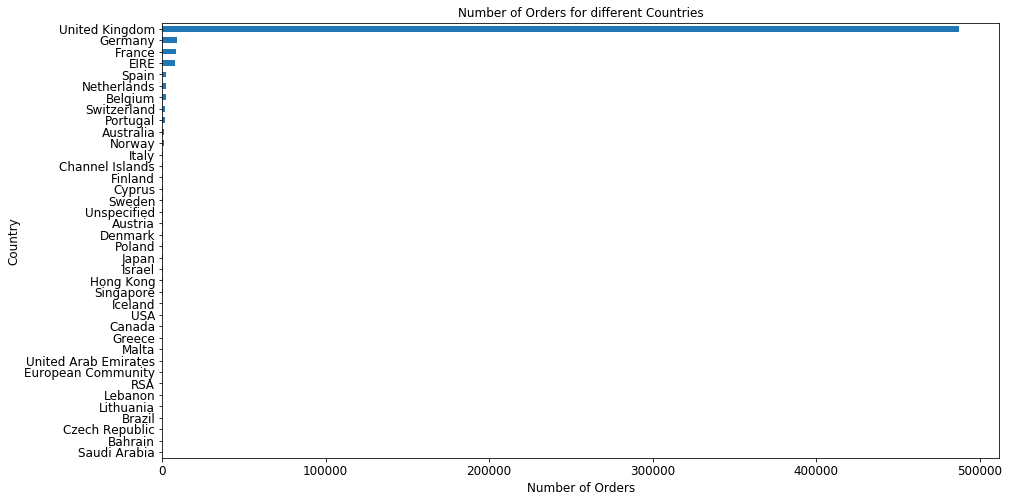

In [48]:
#To analyze number of orders for different countries. As we observe UK has highest number of orders and is skewing the data
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

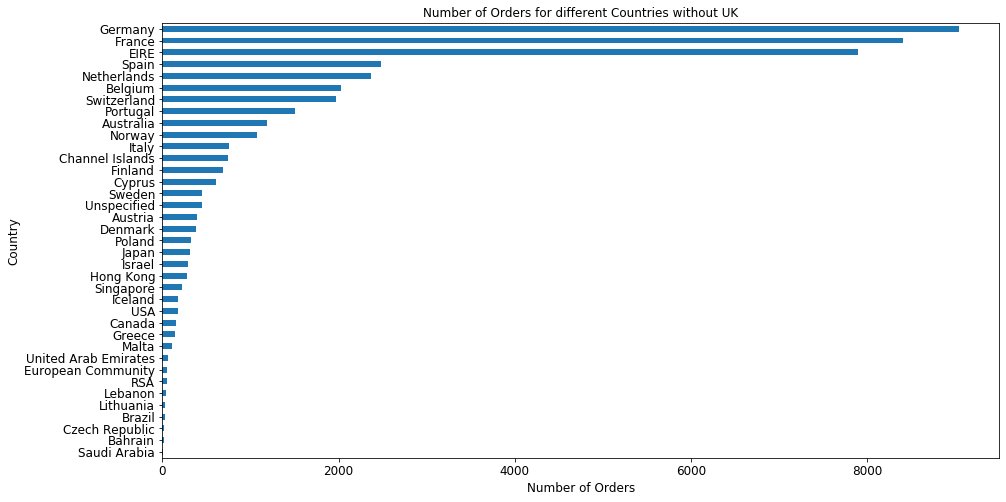

In [49]:
#Removing UK , to analyze other country orders
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries without UK', fontsize=12)
plt.show()

In [50]:
#Analyzing the UnitPrice column after removing negative records
df.UnitPrice.describe()


count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [51]:
# converting units to 1 for higher encoded values to apply the data frame to the apriori model

def one_hot(d):
    if d <= 0:
        return 0
    if d >= 1:
        return(1)



In [272]:
#Splitting the data according to the UK region of transaction

market_basket_UK = df[df['Country'] =="United Kingdom"].groupby(
                ['InvoiceNo', 'Description'])['Quantity']

In [273]:
market_basket_UK = market_basket_UK.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [274]:
market_basket_UK.head()

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
#Hot Encoding the data to give input to the apriori model
market_basket_UK = market_basket_UK.applymap(one_hot)

In [305]:
#Building the model and analyzing the results
frequent_itemsets_UK = apriori(market_basket_UK, min_support=0.03, use_colnames=True)



In [306]:
frequent_itemsets_UK['length'] = frequent_itemsets_UK['itemsets'].apply(lambda x: len(x))

In [307]:
# Advanced and strategical data frequent set selection
frequent_itemsets_UK[ (frequent_itemsets_UK['length'] > 1) &
                   (frequent_itemsets_UK['support'] >= 0.02) ].head(10)

,support,itemsets,length
123,0.030159,"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",2
124,0.030909,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",2
125,0.037551,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",2
126,0.030534,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",2
127,0.042051,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",2
128,0.035194,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",2
129,0.037390,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)",2
130,0.032516,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",2


In [308]:
#Collecting the inferred rules in a dataframe
rules_UK = association_rules(frequent_itemsets_UK, metric="lift", min_threshold=1)
rules_UK = rules_UK.sort_values(['confidence', 'lift'], ascending =[False, False]) 


In [309]:
#To see the total number of rules generated.
print(len(rules_UK))

16


In [310]:

rules_UK

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037658,0.050032,0.030909,0.820768,16.404818,0.029024,5.300218
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050032,0.051264,0.037551,0.750535,14.640537,0.034986,3.803087
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.051264,0.050032,0.037551,0.732497,14.640537,0.034986,3.551247
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.062085,0.103814,0.042051,0.677308,6.524245,0.035605,2.777218
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.046925,0.049818,0.030159,0.642694,12.900874,0.027821,2.659296
7,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.048747,0.103814,0.030534,0.626374,6.033613,0.025473,2.398615
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050032,0.037658,0.030909,0.617773,16.404818,0.029024,2.517724
13,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.060531,0.103814,0.037390,0.617699,5.950055,0.031106,2.344190
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.049818,0.046925,0.030159,0.605376,12.900874,0.027821,2.415149
11,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.060692,0.103814,0.035194,0.579876,5.585724,0.028893,2.133149


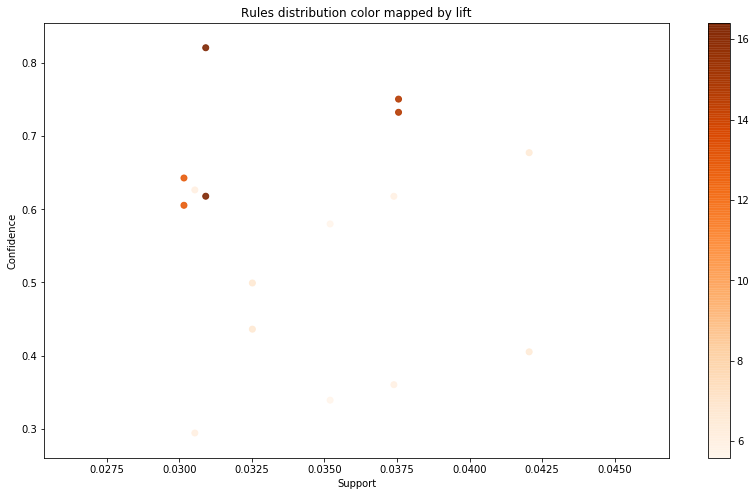

In [312]:
# Visualizing the rules distribution color mapped by Lift
plt.figure(figsize=(14, 8))
plt.scatter(rules_UK['support'], rules_UK['confidence'], c=rules_UK['lift'], alpha=0.9, cmap='Oranges');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [313]:
#Transactions done in Portugal
basket_Portugal = (df[df['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [314]:
basket_Portugal.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,NINE DRAWER OFFICE TIDY,RED SPOT GIFT BAG LARGE,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
#Hot encoding the Portugal data
basket_encoded = basket_Portugal.applymap(one_hot) 
basket_Portugal = basket_encoded 

In [316]:
#Building the model for Portugal and collecting the inferred rules in its dataframe
frq_items_Portugal = apriori(basket_Portugal, min_support = 0.15, use_colnames = True) 
rules_Portugal = association_rules(frq_items_Portugal, metric ="lift", min_threshold = 1) 
rules_Portugal = rules_Portugal.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules_Portugal.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(JUMBO BAG PINK VINTAGE PAISLEY),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.155172,0.189655,0.155172,1.000000,5.272727,0.125743,inf
3,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG PINK VINTAGE PAISLEY),0.189655,0.155172,0.155172,0.818182,5.272727,0.125743,4.646552
0,(BAKING SET 9 PIECE RETROSPOT ),(RETROSPOT TEA SET CERAMIC 11 PC ),0.206897,0.241379,0.155172,0.750000,3.107143,0.105232,3.034483
1,(RETROSPOT TEA SET CERAMIC 11 PC ),(BAKING SET 9 PIECE RETROSPOT ),0.241379,0.206897,0.155172,0.642857,3.107143,0.105232,2.220690


In [317]:
#Total number of rules generated
len(rules_Portugal)

4

In [326]:
#Transactions done in France
basket_France = (df[df['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [327]:
#Hot encoding the France data
basket_France = basket_France.applymap(one_hot) 
 

In [341]:
#Building the model for France transactions
frq_items_France = apriori(basket_France, min_support = 0.15, use_colnames = True) 


In [342]:
#Collecting the inferred rules in France dataframe
rules_France = association_rules(frq_items_France, metric ="lift", min_threshold = 1) 
rules_France = rules_France.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules_France.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RABBIT NIGHT LIGHT),(POSTAGE),0.188776,0.765306,0.165816,0.878378,1.147748,0.021345,1.929705
2,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.181122,0.765306,0.158163,0.873239,1.141033,0.019549,1.851474
1,(POSTAGE),(RABBIT NIGHT LIGHT),0.765306,0.188776,0.165816,0.216667,1.147748,0.021345,1.035606
3,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.765306,0.181122,0.158163,0.206667,1.141033,0.019549,1.032199


In [343]:
len(rules_France)

4

In [348]:
#Transactions done in Sweden
basket_Sweden = (df[df['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [349]:
# Hot encoding the Sweden data
basket_encoded = basket_Sweden.applymap(one_hot) 
basket_Sweden = basket_encoded

In [353]:
##Building the model for Sweden transactions and collecting the inferred rules in its dataframe
frq_items = apriori(basket_Sweden, min_support = 0.1, use_colnames = True) 
rules_Sweden = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules_Sweden = rules_Sweden.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules_Sweden.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PACK OF 60 SPACEBOY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.111111,0.111111,0.111111,1.000000,9.000000,0.098765,inf
3,(PACK OF 72 RETROSPOT CAKE CASES),(PACK OF 60 SPACEBOY CAKE CASES),0.111111,0.111111,0.111111,1.000000,9.000000,0.098765,inf
0,(GUMBALL COAT RACK),(POSTAGE),0.138889,0.611111,0.138889,1.000000,1.636364,0.054012,inf
4,(RABBIT NIGHT LIGHT),(POSTAGE),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
6,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.138889,0.611111,0.138889,1.000000,1.636364,0.054012,inf
8,(WALL TIDY RETROSPOT ),(POSTAGE),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
1,(POSTAGE),(GUMBALL COAT RACK),0.611111,0.138889,0.138889,0.227273,1.636364,0.054012,1.114379
7,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.611111,0.138889,0.138889,0.227273,1.636364,0.054012,1.114379
5,(POSTAGE),(RABBIT NIGHT LIGHT),0.611111,0.111111,0.111111,0.181818,1.636364,0.043210,1.086420
9,(POSTAGE),(WALL TIDY RETROSPOT ),0.611111,0.111111,0.111111,0.181818,1.636364,0.043210,1.086420


In [352]:
len(rules_Sweden)

10